In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ast import literal_eval
import seaborn as sns

In [ ]:
# RESULT_PATH = "final_results/result_rational_2_1736932231.csv"
# RESULT_PATH = "final_results/result_rational_1736690910.csv"
# RESULT_PATH = "final_results/result_sqrt_1736690918.csv"
RESULT_PATH = "final_results/result_manual_1736847721.csv"
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [30]:
df = pd.read_csv(RESULT_PATH)
df.head()

,formula_gubpi,output_faza,time_faza,output_gubpi,time_gubpi,output_latte,time_latte,output_psi,time_psi,output_volesti,time_volesti
0,(8.14*x**0)**(1/2),"(2.798497619628902, 2.898483886718747)",6.938,"Command '['./app/GuBPI', 'experimental_results...",0.267,N\S,0.0,E[p_] = (407/50)^(1/2),0.017,"(nan, nan)",0.0
1,(2.51*x**1+4.63*x**0)**(1/2),"(2.369177856445304, 2.468756103515617)",6.117,"(2.4207947638040466, 2.4217356529114653)",0.401,N\S,0.0,E[p_] = (357/50)^(3/2)*200/753+-(463/100)^(3/2...,0.036,"(nan, nan)",0.0
2,(6.74*x**2+2.58*x**1+8.33*x**0)**(1/2),"(3.370510101318358, 3.470426940917966)",11.529,"(2.979619319933553, 3.4244508837497207)",0.417,N\S,0.0,E[p_] = 1/Integrate[1/(-544801/2500+674/25*xi1...,1.577,"(nan, nan)",0.0
3,(5.7*x**3+9.91*x**2+2.4*x**1+2.86*x**0)**(1/2),"(2.786684455871587, 2.8864392089843802)",46.566,"(2.2496577364511694, 2.839232991838528)",0.453,N\S,0.0,E[p_] = 1/(-Integrate[Boole[-1+xi1<=0]*Boole[-...,0.039,"(nan, nan)",0.0
4,(2.6*x**1+8.12*x**0)**(1/2),"(3.016962890624993, 3.116906738281241)",7.802,"(3.065971707694609, 3.0675433627474873)",0.413,N\S,0.0,E[p_] = (268/25)^(3/2)*10/39+-(203/25)^(3/2)*1...,0.040,"(nan, nan)",0.0


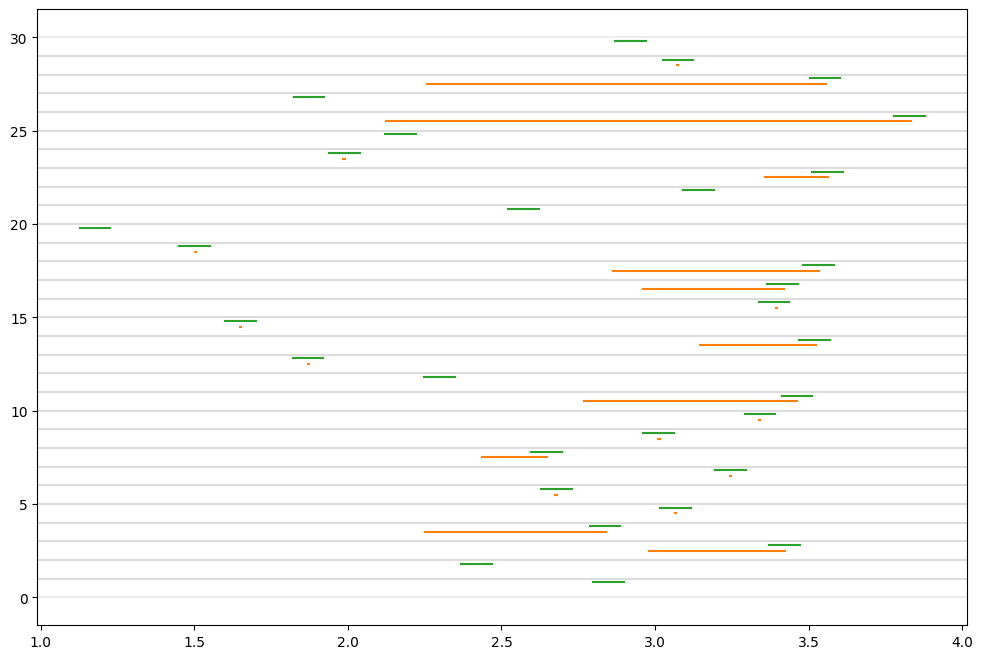

In [31]:
plt.figure(figsize=(12,8))


for i, res in enumerate(df['output_faza'].apply(literal_eval)):
    plt.axhline(y=i, color='black', linestyle='-', linewidth=0.1)
    plt.axhline(y=i+1, color='black', linestyle='-', linewidth=0.1)
    
    plt.plot((res[0], res[1]), (i+0.8, i+0.8), color=colors[2])

for i, res in enumerate(df['output_gubpi']):
    try:
        res = literal_eval(res)
        plt.plot((res[0], res[1]), (i+0.5, i+0.5), color=colors[1])
    except:
        pass

for i, res in enumerate(df['output_volesti']):
    try:
        res = literal_eval(res)
        plt.plot((res[0], res[1]), (i+0.2, i+0.2), color=colors[3])
    except:
        pass

# plt.xlim(0,1)
plt.show()